## Dataset Exploration

### Importing Modules and Datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset
df = pd.read_csv('german_credit_data.csv') 
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [2]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


### Basic Infos

In [4]:
df.shape

(1000, 10)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [3]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


### Missing Values

In [4]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [5]:
# Handling missing values
df["Saving accounts"].fillna("unkown", inplace=True)
df["Checking account"].fillna("unkown", inplace=True)

C:\Users\Brian Biju\AppData\Local\Temp\ipykernel_16828\351348195.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Saving accounts"].fillna("unkown", inplace=True)
C:\Users\Brian Biju\AppData\Local\Temp\ipykernel_16828\351348195.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [6]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

### Target Variable - Risk

In [3]:
# We are adding them based on comparison between loan amount & duration
high_credit = df['Credit amount'] > df['Credit amount'].quantile(0.75)
long_duration = df['Duration'] > df['Duration'].quantile(0.75)

# Simulate Risk: 1 = Good risk, 0 = Bad risk
df['Risk'] = np.where(high_credit & long_duration, 0, 1)

In [8]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,unkown,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,unkown,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


### Converting Catgeorical columns to Numbers

In [9]:
categorical_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Age                          1000 non-null   int64
 1   Job                          1000 non-null   int64
 2   Credit amount                1000 non-null   int64
 3   Duration                     1000 non-null   int64
 4   Risk                         1000 non-null   int64
 5   Sex_male                     1000 non-null   bool 
 6   Housing_own                  1000 non-null   bool 
 7   Housing_rent                 1000 non-null   bool 
 8   Saving accounts_moderate     1000 non-null   bool 
 9   Saving accounts_quite rich   1000 non-null   bool 
 10  Saving accounts_rich         1000 non-null   bool 
 11  Saving accounts_unkown       1000 non-null   bool 
 12  Checking account_moderate    1000 non-null   bool 
 13  Checking account_rich        1000 non-null   bool

## Exploratory Data Analysis

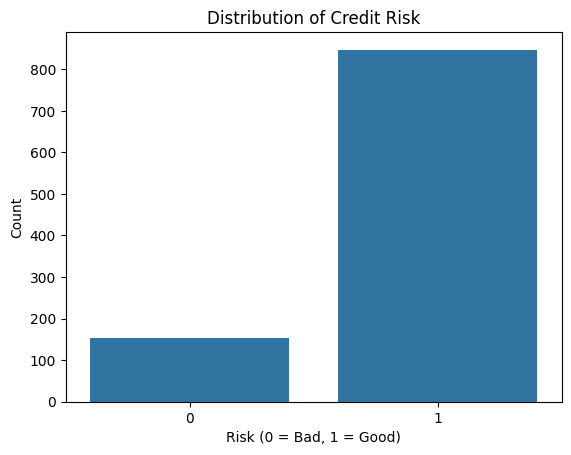

In [4]:
# Class Distribution - Risk
sns.countplot(data=df, x='Risk')
plt.title('Distribution of Credit Risk')
plt.xlabel('Risk (0 = Bad, 1 = Good)')
plt.ylabel('Count')
plt.show()

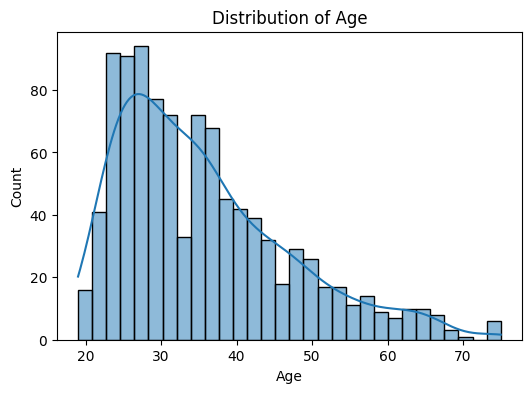

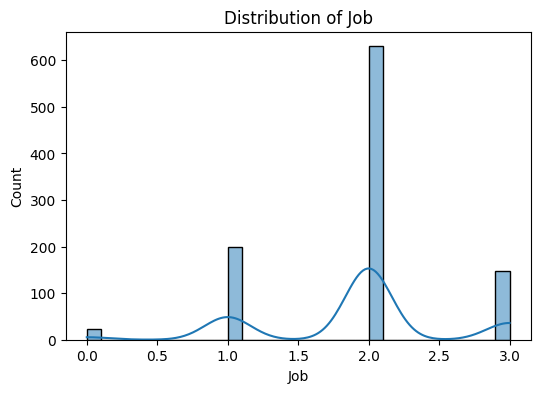

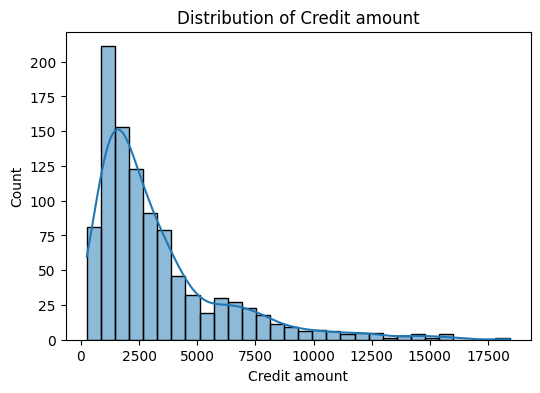

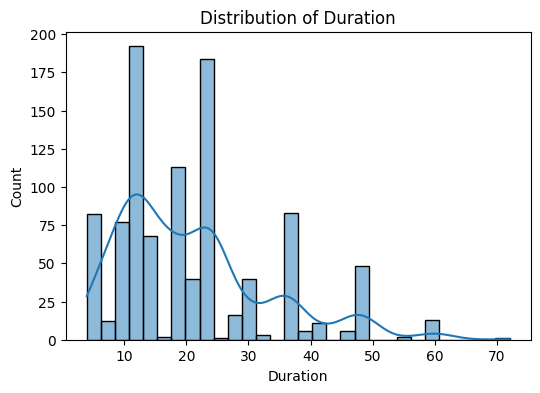

In [16]:
# Feature Distribution - Age, Job, Credit amount, Duration
num_cols = ['Age', 'Job', 'Credit amount', 'Duration']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


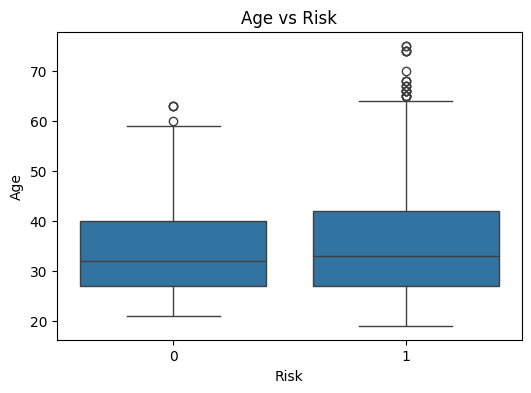

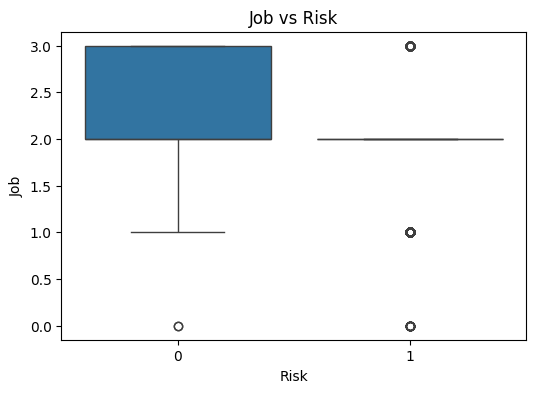

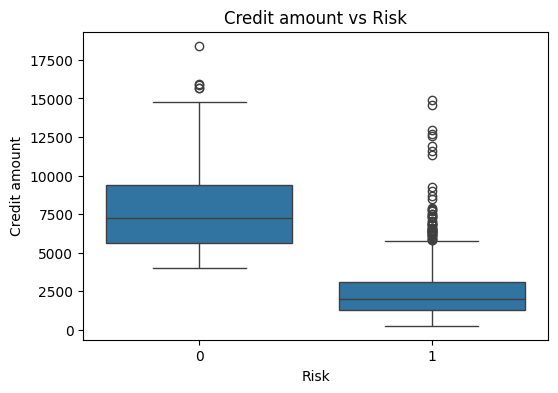

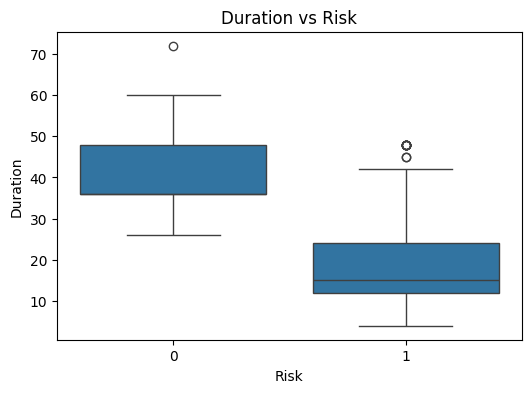

In [17]:
# Boxplots for Outliers vs Risk
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Risk', y=col, data=df)
    plt.title(f'{col} vs Risk')
    plt.show()

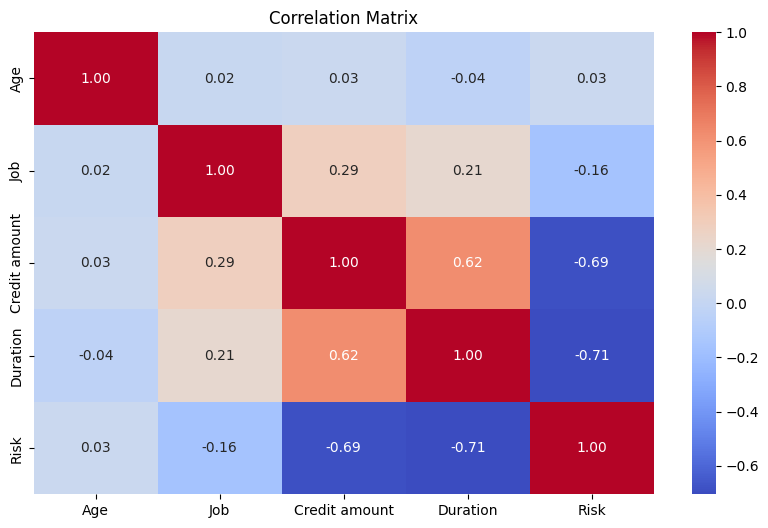

In [18]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols + ['Risk']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

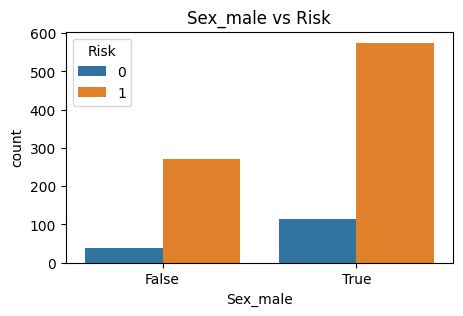

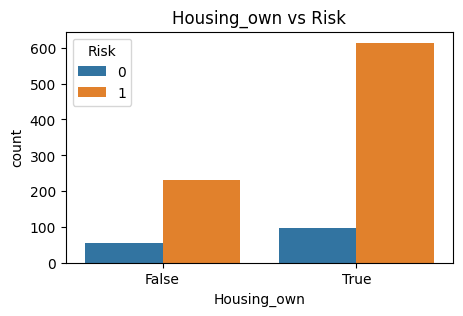

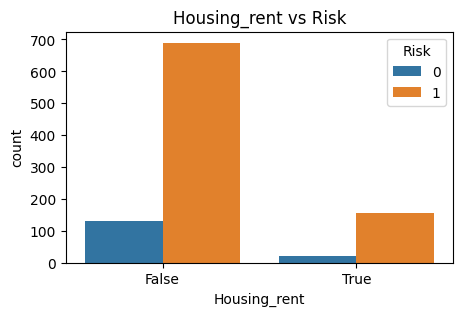

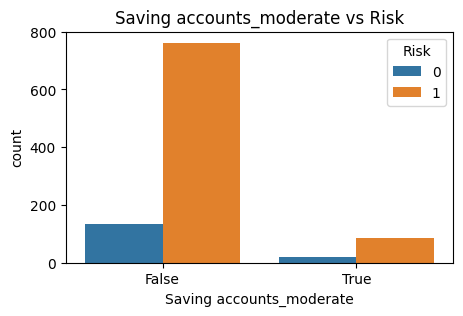

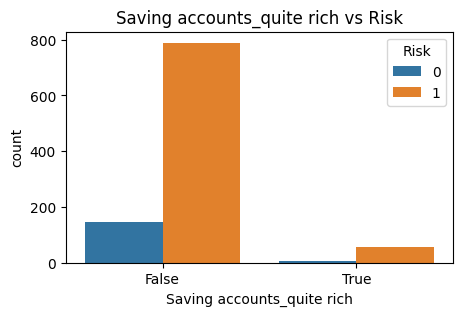

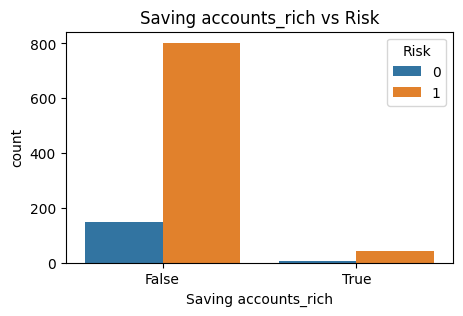

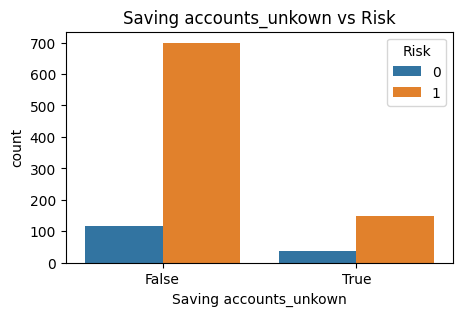

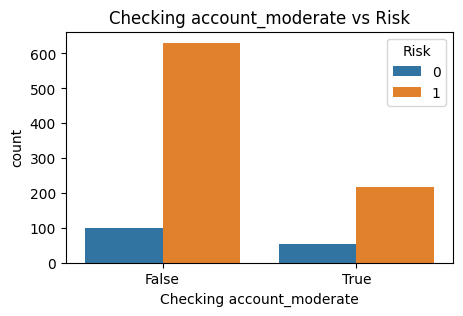

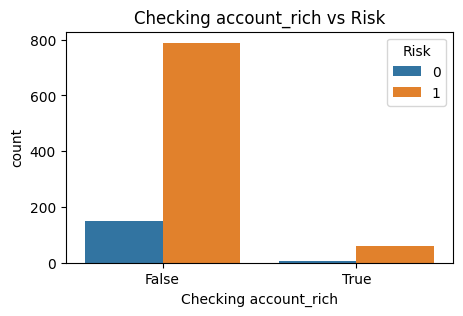

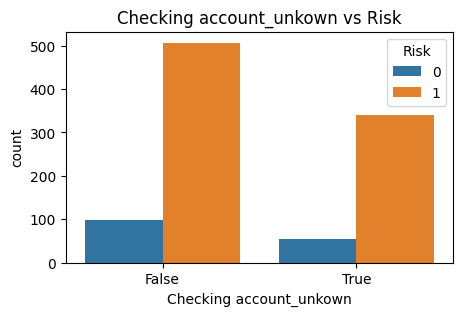

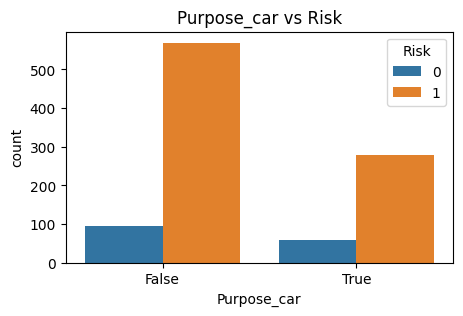

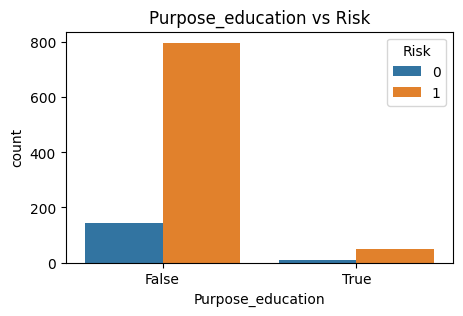

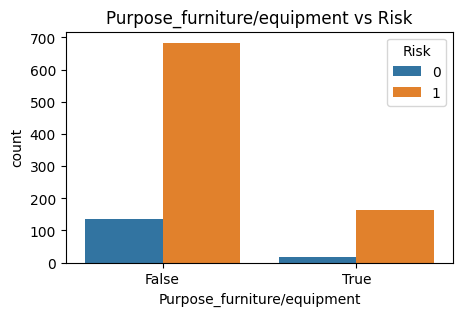

In [19]:
# Countplots for Categorical variables
cat_cols = ['Sex_male', 'Housing_own', 'Housing_rent', 
            'Saving accounts_moderate', 'Saving accounts_quite rich',
            'Saving accounts_rich', 'Saving accounts_unkown',
            'Checking account_moderate', 'Checking account_rich', 'Checking account_unkown',
            'Purpose_car', 'Purpose_education', 'Purpose_furniture/equipment']

for col in cat_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(data=df, x=col, hue='Risk')
    plt.title(f'{col} vs Risk')
    plt.show()


# Model Building

### Train-Test split

In [11]:
from sklearn.model_selection import train_test_split

# Features and Target
X = df.drop('Risk', axis=1)
y = df['Risk']

# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())

X_train shape: (800, 21)
X_test shape: (200, 21)
y_train distribution:
 Risk
1    678
0    122
Name: count, dtype: int64
y_test distribution:
 Risk
1    169
0     31
Name: count, dtype: int64


## Model Training - Logistic Regression

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression

# Initialize and Train
model = LogisticRegression(class_weight='balanced', max_iter=2000)
model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=2000)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87        31
           1       0.99      0.95      0.97       169

    accuracy                           0.95       200
   macro avg       0.89      0.96      0.92       200
weighted avg       0.96      0.95      0.96       200

[[ 30   1]
 [  8 161]]


### Most Influential Features

Duration                  -3.238723
Credit amount             -2.324694
Age                        0.649821
Housing_own               -0.573216
Housing_rent              -0.413340
Purpose_radio/TV           0.392240
Purpose_vacation/others    0.384311
Purpose_education          0.337706
Checking account_unkown   -0.231353
Checking account_rich     -0.187452
dtype: float64


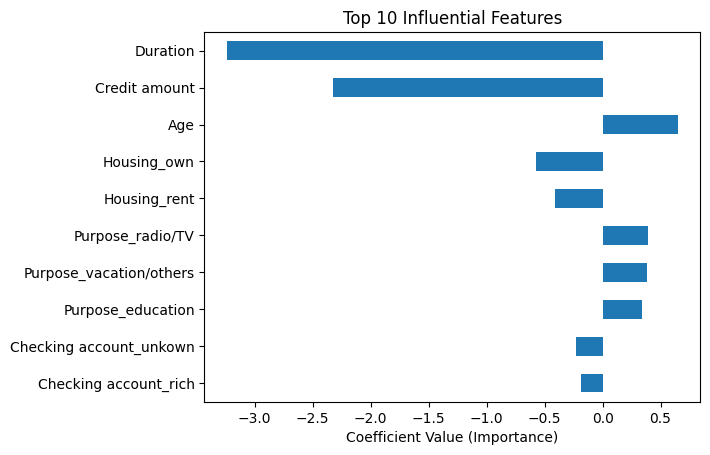

In [31]:
# View feature importance
import pandas as pd
feature_importance = pd.Series(model.coef_[0], index=X_train.columns)
feature_importance_sorted = feature_importance.sort_values(key=abs, ascending=False)

# Display top features
print(feature_importance_sorted.head(10))

# Plot
import matplotlib.pyplot as plt
feature_importance_sorted.head(10).plot(kind='barh')
plt.title('Top 10 Influential Features')
plt.xlabel('Coefficient Value (Importance)')
plt.gca().invert_yaxis()
plt.show()

### Comparison in Model Performances

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Models to compare
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=2000),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "SVM": SVC(class_weight='balanced'),
    "KNN": KNeighborsClassifier()
}

# To store results
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='F1 Score', ascending=False)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score
1        Random Forest     1.000   1.000000  1.000000  1.000000
2        Decision Tree     1.000   1.000000  1.000000  1.000000
3                  SVM     0.965   0.993902  0.964497  0.978979
0  Logistic Regression     0.955   0.993827  0.952663  0.972810
4                  KNN     0.910   0.926554  0.970414  0.947977


## Cross Validation - Check for Overfitting

In [25]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1')
    print(f"{name} - F1 Cross Val Score: {scores.mean():.4f}")

Logistic Regression - F1 Cross Val Score: 0.9621
Random Forest - F1 Cross Val Score: 0.9985
Decision Tree - F1 Cross Val Score: 0.9993
SVM - F1 Cross Val Score: 0.9596
KNN - F1 Cross Val Score: 0.9476


C:\Users\Brian Biju\AppData\Local\Temp\ipykernel_16828\3740591935.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F1 Score', y='Model', data=cv_df, palette='viridis')


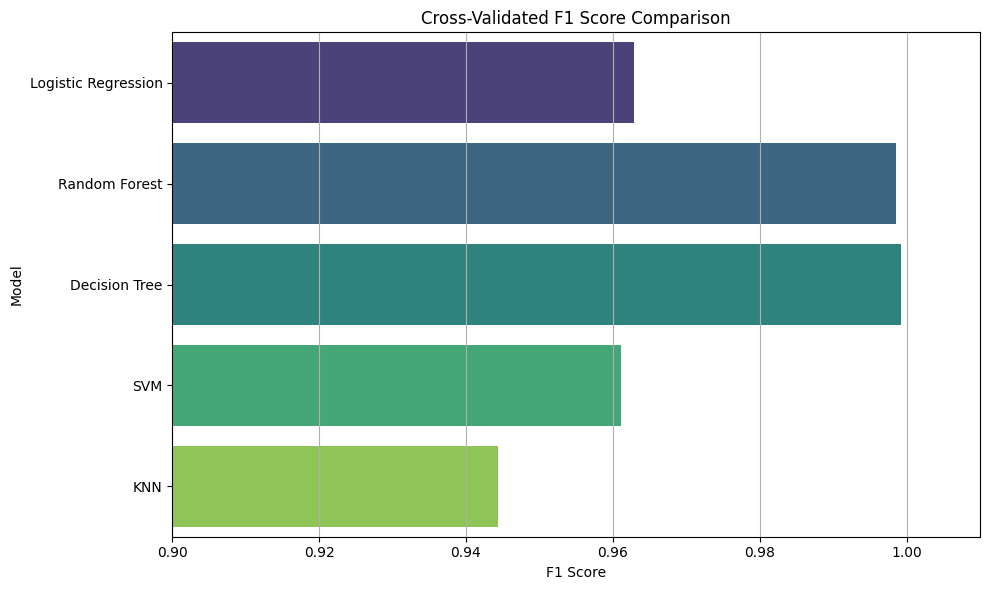

In [26]:
# Plotting the performance
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data for plotting
cv_scores = {
    "Logistic Regression": 0.9629,
    "Random Forest": 0.9985,
    "Decision Tree": 0.9993,
    "SVM": 0.9611,
    "KNN": 0.9443
}

cv_df = pd.DataFrame(list(cv_scores.items()), columns=['Model', 'F1 Score'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='F1 Score', y='Model', data=cv_df, palette='viridis')
plt.title("Cross-Validated F1 Score Comparison")
plt.xlabel("F1 Score")
plt.xlim(0.9, 1.01)
plt.grid(axis='x')
plt.tight_layout()
plt.show()


## Hyperparameter Tuning

In [27]:
# Performance without tuning
model = LogisticRegression(class_weight='balanced', max_iter=2000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [28]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define model and hyperparameter grid
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

#Grid Search
grid = GridSearchCV(logreg, param_grid, cv=5, scoring='f1', verbose=1)
grid.fit(X_train_scaled, y_train)

# Best model
best_model = grid.best_estimator_
print("Best Params:", grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [29]:
y_tuned_pred = best_model.predict(X_test_scaled)

#### Comparison - Before Tuning vs After Tuning

In [30]:
from sklearn.metrics import classification_report

print("Original Logistic Regression Performance:")
print(classification_report(y_test, y_pred))  

print("Tuned Logistic Regression Performance:")
print(classification_report(y_test, y_tuned_pred))  

Original Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        31
           1       0.99      0.95      0.97       169

    accuracy                           0.95       200
   macro avg       0.89      0.96      0.92       200
weighted avg       0.96      0.95      0.96       200

Tuned Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        31
           1       0.99      0.95      0.97       169

    accuracy                           0.95       200
   macro avg       0.89      0.96      0.92       200
weighted avg       0.96      0.95      0.96       200



### Saving Trained Model & Scaler

In [20]:
import joblib
# Trained Model - contains Hyperparameters, Learned Coefficients/Weights
joblib.dump(best_model, 'logistic_model.pkl')

# Scaler
joblib.dump(scaler, 'scaler.pkl')

# Features
joblib.dump(list(X.columns), "features.pkl")

['features.pkl']

## Model Training - Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

# Training
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# Evaluating
y_pred = rf_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00       169

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Accuracy: 1.0


### Saving Model

In [33]:
joblib.dump(rf_model, 'random_forest.pkl')

['random_forest.pkl']